## Apple Health Processor

-----

## Dependencies and Libraries

In [1]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

------

## Functions for Processing Dates and Timezones

In [2]:
# functions to convert UTC to Eastern time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('US/Eastern'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_minute = lambda x: convert_tz(x).minute
get_day_of_week = lambda x: convert_tz(x).weekday()

---

## Steps

In [3]:
steps = pd.read_csv("data/StepCount.csv")

In [4]:
steps.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
214198,Leeor’s Apple Watch,9.6.2,"<<HKDevice: 0x28379f840>, name:Apple Watch, ma...",StepCount,count,2023-09-15 14:11:06 -0400,2023-09-15 13:59:54 -0400,2023-09-15 14:08:32 -0400,202
214199,Leeor,16.6.1,"<<HKDevice: 0x28379fd90>, name:iPhone, manufac...",StepCount,count,2023-09-15 14:11:13 -0400,2023-09-15 14:00:11 -0400,2023-09-15 14:07:16 -0400,181
214200,Leeor’s Apple Watch,9.6.2,"<<HKDevice: 0x28379f840>, name:Apple Watch, ma...",StepCount,count,2023-09-15 14:22:38 -0400,2023-09-15 14:10:22 -0400,2023-09-15 14:20:09 -0400,266
214201,Leeor’s Apple Watch,9.6.2,"<<HKDevice: 0x28379f840>, name:Apple Watch, ma...",StepCount,count,2023-09-15 14:44:59 -0400,2023-09-15 14:32:43 -0400,2023-09-15 14:33:06 -0400,19
214202,Leeor,16.6.1,"<<HKDevice: 0x28379fd90>, name:iPhone, manufac...",StepCount,count,2023-09-15 14:24:14 -0400,2023-09-15 14:13:04 -0400,2023-09-15 14:19:51 -0400,249


In [5]:
# parse out date and time elements as Eastern time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)

In [6]:
steps.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow
0,Leeor,NaN,NaN,StepCount,count,2015-08-15 23:31:20 -0400,2015-08-15 21:32:36-04:00,2015-08-15 21:37:16 -0400,119,2015,2015-08,2015-08-15,15,17,5
1,Leeor,NaN,NaN,StepCount,count,2015-08-15 23:31:20 -0400,2015-08-15 22:20:21-04:00,2015-08-15 22:22:06 -0400,94,2015,2015-08,2015-08-15,15,18,5
2,Leeor,NaN,NaN,StepCount,count,2015-08-15 23:31:20 -0400,2015-08-15 22:30:16-04:00,2015-08-15 22:31:11 -0400,69,2015,2015-08,2015-08-15,15,18,5
3,Leeor,NaN,NaN,StepCount,count,2015-08-15 23:31:20 -0400,2015-08-15 23:20:02-04:00,2015-08-15 23:25:03 -0400,186,2015,2015-08,2015-08-15,15,19,5
4,Leeor,NaN,NaN,StepCount,count,2015-08-15 23:31:20 -0400,2015-08-15 23:25:03-04:00,2015-08-15 23:30:13 -0400,138,2015,2015-08,2015-08-15,15,19,5


In [7]:
steps.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value', 'year', 'month', 'date', 'day', 'hour',
       'dow'],
      dtype='object')

In [8]:
steps_by_date = steps.groupby(['date'])['value'].sum().reset_index(name='Steps')

In [9]:
steps_by_date.tail()

,date,Steps
2797,2023-09-11,9501
2798,2023-09-12,11620
2799,2023-09-13,5852
2800,2023-09-14,9059
2801,2023-09-15,2600


In [10]:
# steps_by_date.tail(10)
steps_by_date.to_csv("data/steps_per_day.csv", index=False)

-----

### Use Only Watch Steps, Remove Phone Steps

In [11]:
steps_device_by_year = steps.groupby(['year', 'sourceName'])['value'].sum().reset_index(name='Steps')

In [12]:
steps_device_by_year

,year,sourceName,Steps
0,2015,Leeor,624781
1,2016,Leeor,1613427
2,2017,Leeor,960648
3,2018,Leeor,2061604
4,2019,Leeor,2350016
5,2020,Leeor,1764226
6,2020,Leeor’s Apple Watch,1745626
7,2021,Leeor,2267624
8,2021,Leeor’s Apple Watch,2179916
9,2022,Leeor,2489409


In [13]:
steps.sourceName.unique()

array(['Leeor', 'Leeor’s Apple\xa0Watch'], dtype=object)

In [14]:
# drop phone steps
steps = steps[steps.sourceName == 'Leeor’s Apple\xa0Watch']
# steps.head()

## Rolling Average

<AxesSubplot:title={'center':'Daily step counts rolling mean over 10 days'}, xlabel='date'>

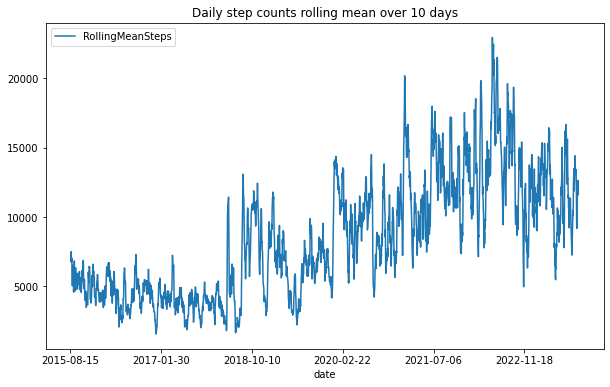

In [15]:
steps_by_date['RollingMeanSteps'] = steps_by_date.Steps.rolling(window=10, center=True).mean()
steps_by_date.plot(x='date', y='RollingMeanSteps', title= 'Daily step counts rolling mean over 10 days', figsize=[10, 6])

## Steps by Day of Week

In [16]:
steps_by_date['date'] = pd.to_datetime(steps_by_date['date'])
steps_by_date['dow'] = steps_by_date['date'].dt.weekday

Text(0.5, 0, 'Day of Week')

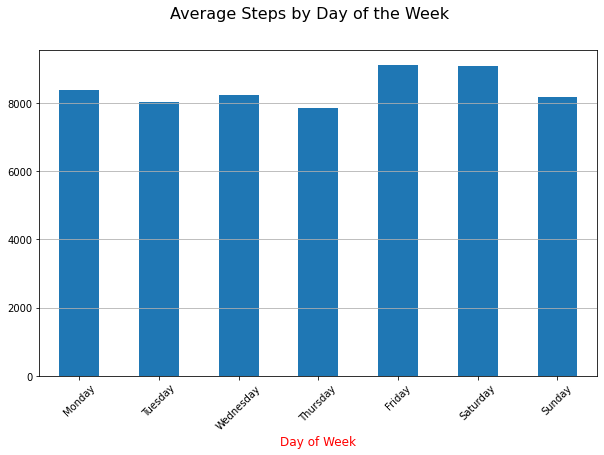

In [17]:
data = steps_by_date.groupby(['dow'])['Steps'].mean()

fig, ax = plt.subplots(figsize=[10, 6])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)

plt.suptitle('Average Steps by Day of the Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Day of Week', fontsize=12, color='red')

------

## Monthly Steps

In [18]:
total_steps_by_month = steps.groupby(['month'])['value'].sum().reset_index(name='Steps')

In [19]:
total_steps_by_month

,month,Steps
0,2020-01,214368
1,2020-02,185335
2,2020-03,134975
3,2020-04,133381
4,2020-05,163140
5,2020-06,181326
6,2020-07,190176
7,2020-08,76383
8,2020-09,105516
9,2020-10,127512


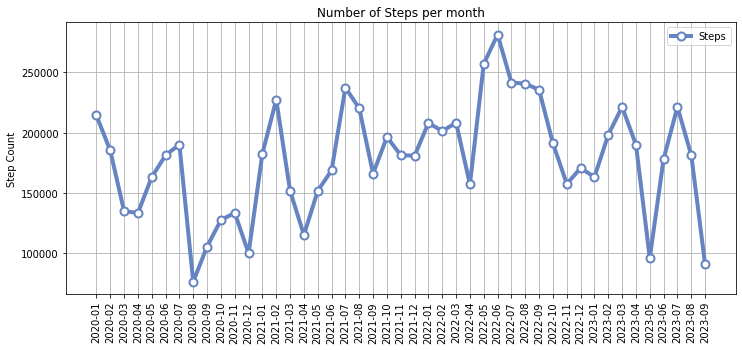

In [20]:
# a bit of a hackish solution, could use improvement
dataset = total_steps_by_month
chart_title = 'Number of Steps per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Step Count')
# ax.set_xlabel('')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

----

## Steps Per Year

In [21]:
total_steps_by_years = steps.groupby(['year'])['value'].sum().reset_index(name='Steps')

In [22]:
total_steps_by_years

,year,Steps
0,2020,1745626
1,2021,2179916
2,2022,2550794
3,2023,1540804


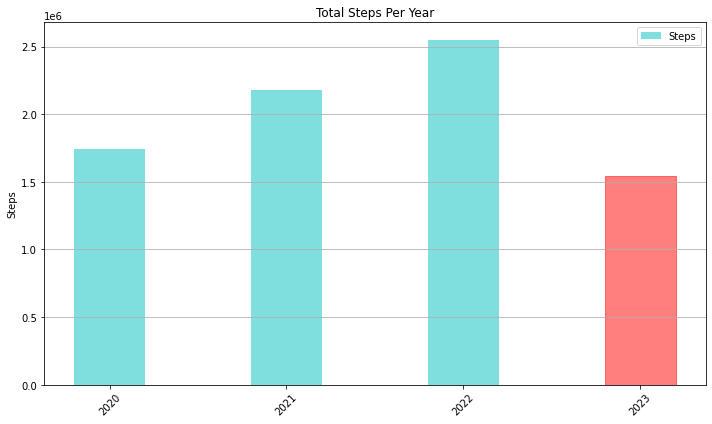

In [23]:
dataset = total_steps_by_years

n_groups = len(dataset)
opacity = 0.5
fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)
index = np.arange(n_groups)
bar_width = 0.4

data = plt.bar(index, dataset.Steps, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Steps')

data[-1].set_color('r')

plt.ylabel('Steps')
plt.title('Total Steps Per Year')
plt.xticks(index, dataset.year, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

-----

## Steps by Hour of Day

In [24]:
hour_steps = steps.groupby(['hour'])['value'].sum().reset_index(name='Steps')

In [25]:
# hour_steps

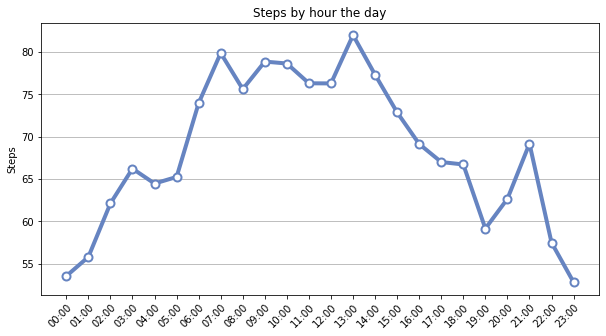

In [26]:
ax = hour_steps.Steps.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_steps.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

# ax.set_xlim((hour_steps.index[0], hour_steps.index[-1]))

ax.yaxis.grid(True)
# ax.set_ylim((0, 1300))
ax.set_ylabel('Steps')
ax.set_xlabel('')
ax.set_title('Steps by hour the day')

plt.show()

-----

In [27]:
weight = pd.read_csv("data/BodyMass.csv")

In [28]:
# weight.columns

In [29]:
# parse out date and time elements as Eastern time
weight['startDate'] = pd.to_datetime(weight['startDate'])
weight['year'] = weight['startDate'].map(get_year)
weight['month'] = weight['startDate'].map(get_month)
weight['date'] = weight['startDate'].map(get_date)

In [30]:
weight.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date
0,Health,10.1.1,NaN,BodyMass,lb,2016-12-04 18:13:07 -0400,2016-12-04 18:13:07-04:00,2016-12-04 18:13:07 -0400,110,2016,2016-12,2016-12-04
1,Leeor,13.3,NaN,BodyMass,lb,2020-01-03 15:56:51 -0400,2020-01-03 15:56:51-04:00,2020-01-03 15:56:51 -0400,127,2020,2020-01,2020-01-03
2,Health,15.6.1,NaN,BodyMass,lb,2023-02-08 13:58:15 -0400,2023-02-08 13:58:00-04:00,2023-02-08 13:58:00 -0400,135,2023,2023-02,2023-02-08


In [31]:
month_weight = weight.groupby(['month'])['value'].mean().reset_index(name='Weight')

In [32]:
# month_weight

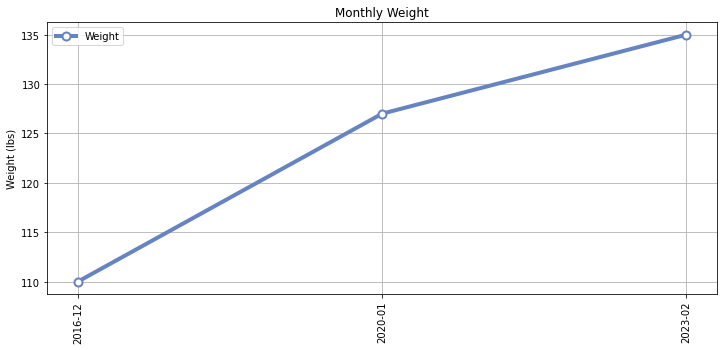

In [33]:
# a bit of a hackish solution, could use improvement
dataset = month_weight
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Weight (lbs)')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

In [34]:
# convert to kg
month_weight['kg'] = round(month_weight['Weight'] / 2.205, 2)

In [35]:
month_weight.columns

Index(['month', 'Weight', 'kg'], dtype='object')

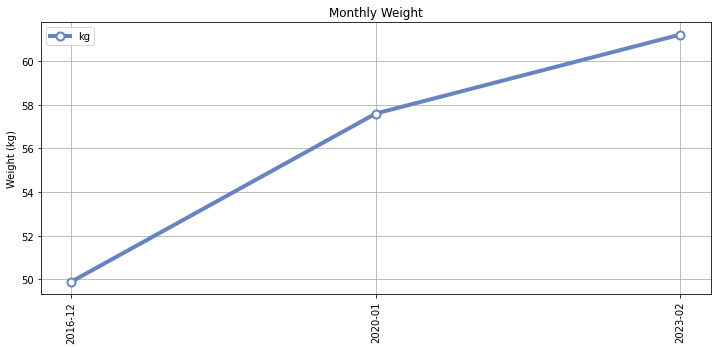

In [36]:
# a bit of a hackish solution, could use improvement
dataset = month_weight[['month', 'kg']]
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Weight (kg)')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

## Heart Rate

In [37]:
resting = pd.read_csv("data/RestingHeartRate.csv")
len(resting)

1225

In [38]:
resting.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value'],
      dtype='object')

In [39]:
resting.sourceName.unique()

array(['Leeor’s Apple\xa0Watch'], dtype=object)

In [40]:
# parse out date and time elements as Eastern time
resting['startDate'] = pd.to_datetime(resting['startDate'])
resting['year'] = resting['startDate'].map(get_year)
resting['month'] = resting['startDate'].map(get_month)
resting['date'] = resting['startDate'].map(get_date)

In [41]:
# resting.tail(10)

<AxesSubplot:title={'center':'Resting HR'}, xlabel='date'>

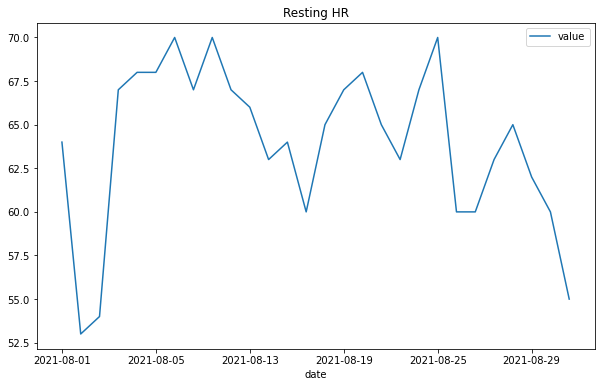

In [51]:
resting[resting.month == '2021-08'].plot(x='date', y='value', title= 'Resting HR', figsize=[10, 6])

In [43]:
hr = pd.read_csv("data/HeartRate.csv")
len(hr)

234013

In [44]:
# hr.tail(10)

In [45]:
# parse out date and time elements as Eastern time
hr['startDate'] = pd.to_datetime(hr['startDate'])
hr['year'] = hr['startDate'].map(get_year)
hr['month'] = hr['startDate'].map(get_month)
hr['hour'] = hr['startDate'].map(get_hour)
hr['date'] = hr['startDate'].map(get_date)

<AxesSubplot:title={'center':'HR'}, xlabel='startDate'>

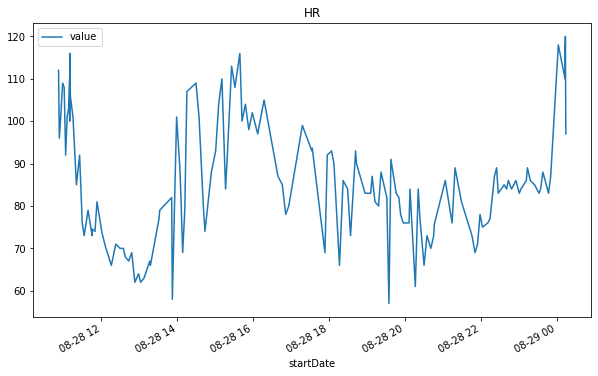

In [50]:
# plot a single day
test_date = '2021-08-28'
# len(hr[hr.date == test_date])
# TODO: Fix Axis for Hour of Day or Something Similar
hr[hr.date == test_date].plot(x='startDate', y='value', title= 'HR', figsize=[10, 6])

------

# Sleep

In [47]:
sleep_raw = pd.read_csv("data/SleepAnalysis.csv")

In [48]:
sleep_raw.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
431,Clock,50.0,"<<HKDevice: 0x28378eda0>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-12-10 10:40:21 -0400,2018-12-10 07:10:28 -0400,2018-12-10 07:34:32 -0400,HKCategoryValueSleepAnalysisInBed
432,Clock,50.0,"<<HKDevice: 0x28378eda0>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-12-10 10:40:21 -0400,2018-12-10 07:35:20 -0400,2018-12-10 07:45:08 -0400,HKCategoryValueSleepAnalysisInBed
433,Clock,50.0,"<<HKDevice: 0x28378eda0>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-12-10 10:40:21 -0400,2018-12-10 08:08:04 -0400,2018-12-10 08:09:28 -0400,HKCategoryValueSleepAnalysisInBed
434,Clock,50.0,"<<HKDevice: 0x28378eda0>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-12-10 10:40:21 -0400,2018-12-10 08:09:44 -0400,2018-12-10 08:21:52 -0400,HKCategoryValueSleepAnalysisInBed
435,Clock,50.0,"<<HKDevice: 0x28378eda0>, name:iPhone, manufac...",SleepAnalysis,NaN,2018-12-10 10:40:21 -0400,2018-12-10 08:22:40 -0400,2018-12-10 10:40:11 -0400,HKCategoryValueSleepAnalysisInBed


In [49]:
# parse out date and time elements as Eastern time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)

In [52]:
sleep_raw['value'].unique()

array(['HKCategoryValueSleepAnalysisInBed'], dtype=object)